In [463]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [464]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

In [465]:
dataset= pd.read_csv( "space titanic train.csv")
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [466]:
dataset.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [467]:
numerical_features=[x for x in dataset.columns if dataset[x].dtype!="O" and  dataset[x].dtype!="bool"]
dataset[numerical_features].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [468]:
dataset[numerical_features].nunique()

Age               80
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
dtype: int64

In [469]:
dataset[numerical_features].isna().mean()

Age             0.020591
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
dtype: float64

In [470]:
dataset['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [471]:
dataset.loc[dataset["Transported"],'Transported']=1
dataset.loc[dataset["Transported"]==False,'Transported']=0

In [472]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [473]:
dataset. drop("Name", axis=1, inplace=True) 

In [474]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [475]:
dataset["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [476]:
dataset.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [477]:
dataset["VIP"].isna().sum()

203

In [478]:
categorical_features=[x for x in dataset.columns if dataset[x].dtype=="O" and  dataset[x].dtype!="bool"]
dataset[categorical_features].head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,1


In [479]:
dataset.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported      object
dtype: object

In [480]:
dataset['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

# filling categoricaol features

In [481]:
categorical_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Transported']

In [482]:
dataset[ 'HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [483]:
mode=dataset[ 'HomePlanet'].value_counts().index[0]
dataset["HomePlanet"].fillna(mode,inplace=True)
dataset["HomePlanet"].isna().sum()

0

In [484]:
mode

'Earth'

In [485]:
dataset[ 'CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [486]:
dataset[ 'CryoSleep'].fillna("False",inplace=True)

In [487]:
dataset[ 'CryoSleep'].isna().sum()

0

In [488]:
dataset["Destination"].fillna(dataset["Destination"].value_counts().index[0],inplace=True)

In [489]:
dataset[ 'Destination'].isna().sum()

0

In [490]:
dataset[ 'VIP'].fillna("False",inplace=True)

In [491]:
categorical_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Transported']

In [492]:
dataset[ 'Destination'].head()

0    TRAPPIST-1e
1    TRAPPIST-1e
2    TRAPPIST-1e
3    TRAPPIST-1e
4    TRAPPIST-1e
Name: Destination, dtype: object

In [493]:
dataset["Cabin"].unique()


array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [494]:
##Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [495]:
dataset['deck'] = dataset['Cabin'].str.split("/", 2,expand=True)[0]
dataset['num'] = dataset['Cabin'].str.split("/", 2,expand=True)[1]
dataset['side'] = dataset['Cabin'].str.split("/", 2,expand=True)[2]

In [496]:
dataset["deck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [497]:
dataset["deck"].isna().sum()

199

In [498]:
dataset["deck"].fillna("F",inplace=True)
dataset["deck"].isna().sum()

0

In [499]:
dataset["deck"].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [500]:
#nummmode=dataset.groupby(dataset["deck"])["side"].value_counts().index[0]
#nummmode

In [501]:
numode=dataset[dataset.deck=="F"]["side"].value_counts().index[0]
#numode came as p
# filled all null values as p

dataset["side"].fillna(numode,inplace=True)

### idhi crct e

In [502]:
dataset["side"].unique()

array(['P', 'S'], dtype=object)

In [503]:
dataset.pop("Cabin")
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [504]:
dataset["num"].isna().sum()

199

In [505]:
dataset["num"]=dataset['num'].astype(float)

In [506]:
maxx=dataset["num"].max()

In [507]:
dataset["num"].fillna(maxx/2,inplace=True)
dataset["num"].isna().sum()

0

# filling numerical null

In [508]:

dataset[numerical_features].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [509]:
numerical_features


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [510]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S


In [511]:
dataset["Age"].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [512]:
dataset['Age'].median()

27.0

In [513]:
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [514]:
dataset["VIP"].unique()

array([False, True, 'False'], dtype=object)

In [515]:
luxury_F=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [516]:
dataset.loc[dataset["VIP"]==True,luxury_F].isna().sum()
## even if VIP is there ,there are null values 

RoomService     4
FoodCourt       6
ShoppingMall    5
Spa             2
VRDeck          4
dtype: int64

In [517]:
##for x in numerical_features:
  #  dataset[x].fillna(dataset[x].median(),inplace=True)

In [518]:
#VIP - Whether the passenger has paid for special VIP service during the voyage
#As it would be quite unusual to not have recorded payment data from a VIP passenger
#, we are going to consider that missing values as 0

In [519]:
#dataset[luxury_F].fillna(0.0,inplace=True)
dataset[luxury_F]=dataset[luxury_F].fillna(0.0)

dataset['ShoppingMall'].isna().sum()

0

fill na wont work for list? here luxury_F ki inplace=true ani isthe update avvaled

In [520]:
dataset[luxury_F].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

# EDA


In [521]:
dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'deck', 'num', 'side'],
      dtype='object')

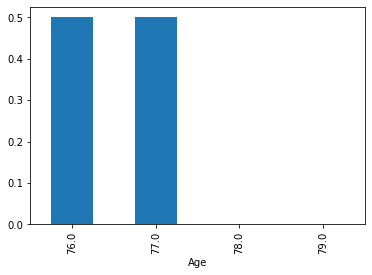

In [522]:
dataset.groupby(dataset.loc[(dataset["Age"]<100) & (dataset["Age"]>75) ,"Age"])["Transported"].median().plot.bar()
plt.show()

In [523]:
#dataset.groupby(dataset.loc[(dataset["Age"]<50) AND (dataset["Age"]<50) ,"Age"])["Transported"].median().plot.bar()
#not working y?
#AND place lo & pedthe came

In [524]:
dataset[["Transported","Age"]].head()

,Transported,Age
0,0,39.0
1,1,24.0
2,0,58.0
3,0,33.0
4,1,16.0


In [525]:
dataset["Transported"].isna().sum()

0

In [526]:
dataset["Transported"].astype(int)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [527]:
dataset["Transported"].dtype

dtype('O')

In [528]:
 dataset.loc[dataset["Transported"]=="0","Transported"]=2
#    dataset["Transported"]=0
#else:
    #dataset["Transported"]=1
 dataset.loc[dataset["Transported"]=="1","Transported"]=3


In [529]:
dataset['Transported'] = dataset['Transported'].astype(int)

In [530]:
convert_dict = {'Transported': int}
dataset.astype(convert_dict)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,A,98.0,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,G,1499.0,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,G,1500.0,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,E,608.0,S


In [531]:
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

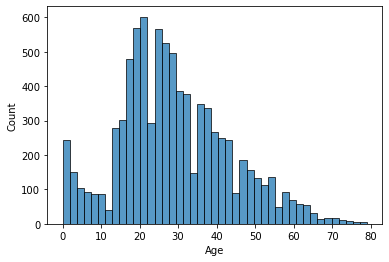

<Figure size 1440x1440 with 0 Axes>

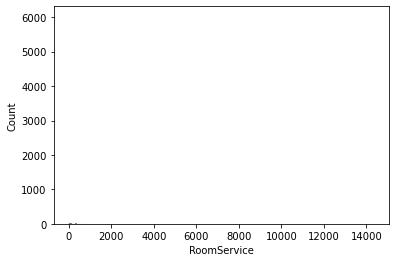

<Figure size 1440x1440 with 0 Axes>

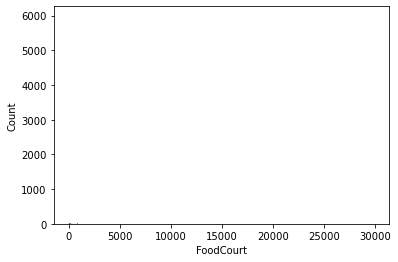

<Figure size 1440x1440 with 0 Axes>

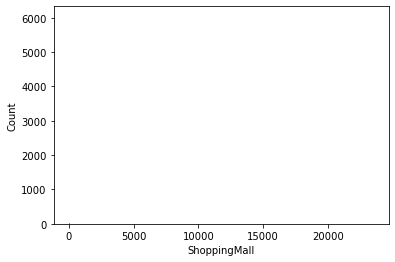

<Figure size 1440x1440 with 0 Axes>

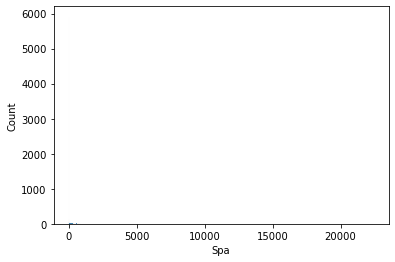

<Figure size 1440x1440 with 0 Axes>

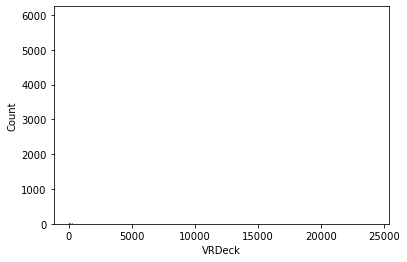

<Figure size 1440x1440 with 0 Axes>

In [532]:
for x in numerical_features:
    sns.histplot(x=dataset[x])
    plt.figure(figsize=(20,20))
    plt.show()

In [533]:
dataset[numerical_features].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.489021,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [534]:

dataset.Spa.quantile(0.9)

722.0

In [535]:
dataset.loc[(dataset["Spa"]>0) & (dataset["Spa"]<2900),"Transported"].value_counts()

0    2072
1     880
Name: Transported, dtype: int64

In [536]:
dataset.loc[(dataset["Spa"]>3090) & (dataset["Spa"]<dataset["Spa"].max()),"Transported"].value_counts()

0    212
1      4
Name: Transported, dtype: int64

In [537]:
drop_index=dataset[(dataset["Spa"]>2500) & (dataset["Transported"]==1)].index
dataset=dataset[~dataset.index.isin(drop_index)]

In [538]:
dataset.loc[(dataset["Spa"]>2500), 'Transported'].value_counts()

0    270
Name: Transported, dtype: int64

In [539]:
dataset.loc[(dataset["Spa"]>2500), 'Spa'] = 2500

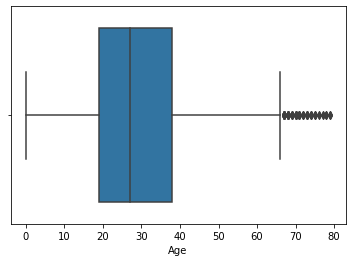

<Figure size 1440x1440 with 0 Axes>

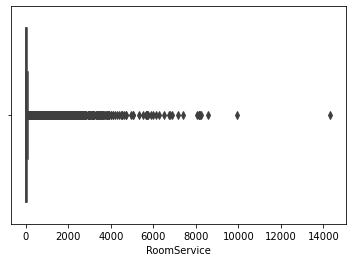

<Figure size 1440x1440 with 0 Axes>

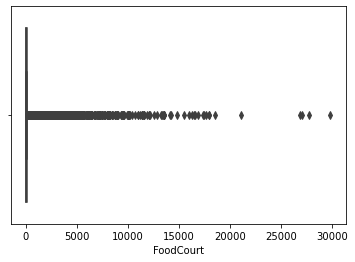

<Figure size 1440x1440 with 0 Axes>

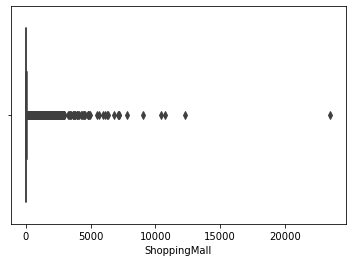

<Figure size 1440x1440 with 0 Axes>

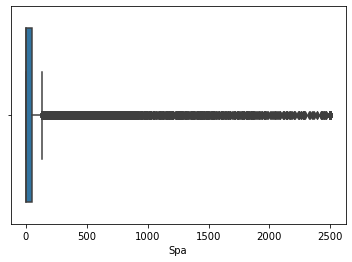

<Figure size 1440x1440 with 0 Axes>

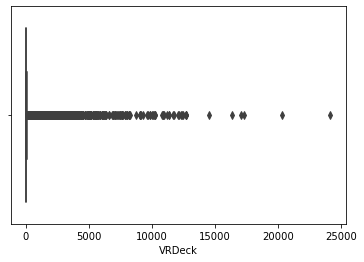

<Figure size 1440x1440 with 0 Axes>

In [540]:
for x in numerical_features:
    sns.boxplot(x=dataset[x])
    plt.figure(figsize=(20,20))
    plt.show()

In [541]:
dataset["RoomService"].describe()

count     8686.000000
mean       219.919526
std        660.375530
min          0.000000
25%          0.000000
50%          0.000000
75%         41.000000
max      14327.000000
Name: RoomService, dtype: float64

In [542]:
dataset.loc[(dataset["RoomService"]>2500) & (dataset["RoomService"]<15000),"Transported"].value_counts()

0    129
1      9
Name: Transported, dtype: int64

In [543]:
drop=dataset[(dataset["RoomService"]>2500) & (dataset["Transported"]==1)].index
drop
dataset=dataset[~dataset.index.isin(drop)]

In [544]:
dataset.loc[dataset["RoomService"]>2500,"RoomService"]=2500

In [545]:
dataset["FoodCourt"].describe()

count     8677.000000
mean       444.425147
std       1585.655205
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [546]:
dataset.loc[(dataset["FoodCourt"]>0) & (dataset["FoodCourt"]<18000),"Transported"].value_counts()

0    1999
1    1037
Name: Transported, dtype: int64

In [547]:
dropp=dataset[(dataset["FoodCourt"]>18000) & (dataset["Transported"]==1)].index
dataset=dataset[~dataset.index.isin(dropp)]

In [548]:
len(dropp)

6

In [562]:
dataset.loc[dataset["FoodCourt"]>3500,"Transported"].value_counts()

1    208
0    107
Name: Transported, dtype: int64

In [550]:
dataset["VRDeck"].describe()

count     8671.000000
mean       297.282090
std       1134.102506
min          0.000000
25%          0.000000
50%          0.000000
75%         39.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [551]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,2500.0,49.0,0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,2500.0,193.0,0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S


In [449]:
dataset.loc[dataset["VRDeck"]>5000,"Transported"].value_counts()

0    107
1      1
Name: Transported, dtype: int64

In [552]:
dro=dataset[(dataset["VRDeck"]>5000) & (dataset["Transported"]==1)].index
dataset=dataset[~dataset.index.isin(dro)]

In [553]:
dataset.loc[dataset["VRDeck"]>5000,"VRDeck"]=5000

In [555]:
dataset["ShoppingMall"].describe()

count     8670.000000
mean       168.833679
std        596.127082
min          0.000000
25%          0.000000
50%          0.000000
75%         22.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [569]:
dataset.loc[dataset["ShoppingMall"]>9000,"Transported"].value_counts()

1    3
0    2
Name: Transported, dtype: int64

In [572]:
dr=dataset.loc[(dataset["ShoppingMall"]>9000) & (dataset["Transported"]==1)].index
dataset=dataset[~dataset.index.isin(dr)]

In [462]:
dataset.max_rows


AttributeError: 'DataFrame' object has no attribute 'max_rows'

In [373]:
dataset.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num
Age,1.000000,0.068725,0.128122,0.032449,0.147770,0.100161,-0.075654,-0.129271
RoomService,0.068725,1.000000,-0.014598,0.049701,0.006602,-0.018665,-0.241504,-0.005303
FoodCourt,0.128122,-0.014598,1.000000,-0.013570,0.231697,0.224478,0.044339,-0.178459
ShoppingMall,0.032449,0.049701,-0.013570,1.000000,0.008520,-0.008065,0.008442,0.001716
Spa,0.147770,0.006602,0.231697,0.008520,1.000000,0.177114,-0.292636,-0.130913
VRDeck,0.100161,-0.018665,0.224478,-0.008065,0.177114,1.000000,-0.205105,-0.136371
Transported,-0.075654,-0.241504,0.044339,0.008442,-0.292636,-0.205105,1.000000,-0.043707
num,-0.129271,-0.005303,-0.178459,0.001716,-0.130913,-0.136371,-0.043707,1.000000


In [573]:
dataset.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num
Age,1.000000,0.083206,0.137946,0.044062,0.147924,0.114721,-0.075821,-0.129138
RoomService,0.083206,1.000000,-0.032111,0.065247,-0.019638,-0.030784,-0.289512,0.003470
FoodCourt,0.137946,-0.032111,1.000000,-0.014262,0.247617,0.249455,0.035225,-0.183150
ShoppingMall,0.044062,0.065247,-0.014262,1.000000,0.010645,-0.005566,-0.000372,0.008998
Spa,0.147924,-0.019638,0.247617,0.010645,1.000000,0.211289,-0.293488,-0.130897
VRDeck,0.114721,-0.030784,0.249455,-0.005566,0.211289,1.000000,-0.246926,-0.153210
Transported,-0.075821,-0.289512,0.035225,-0.000372,-0.293488,-0.246926,1.000000,-0.042025
num,-0.129138,0.003470,-0.183150,0.008998,-0.130897,-0.153210,-0.042025,1.000000


In [253]:
dataset["PassengerId"].dtype

dtype('int32')

In [252]:
dataset["PassengerId"] = dataset["PassengerId"].astype(int)

In [262]:
dataset.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
deck              0
num               0
side              0
dtype: int64

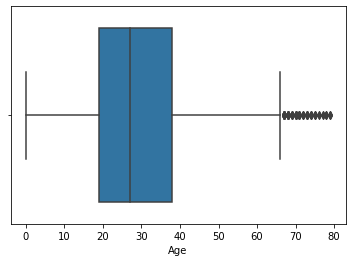

<Figure size 1440x1440 with 0 Axes>

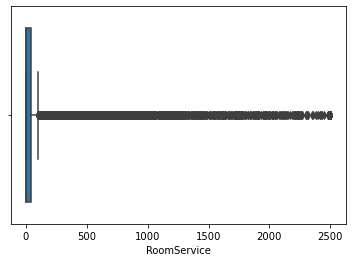

<Figure size 1440x1440 with 0 Axes>

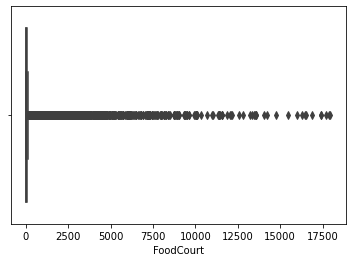

<Figure size 1440x1440 with 0 Axes>

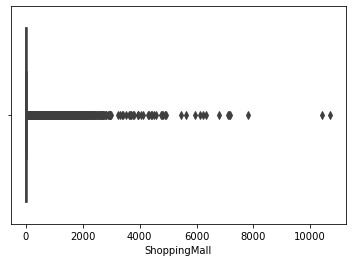

<Figure size 1440x1440 with 0 Axes>

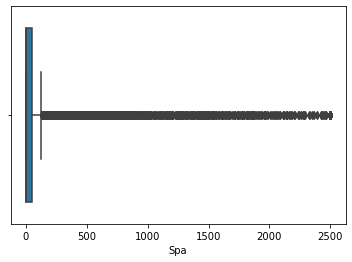

<Figure size 1440x1440 with 0 Axes>

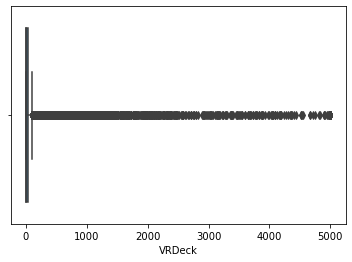

<Figure size 1440x1440 with 0 Axes>

In [574]:
for x in numerical_features:
    sns.boxplot(x=dataset[x])
    plt.figure(figsize=(20,20))
    plt.show()

In [ ]:
# change age values into